In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
pd.__version__  # for the record

'1.1.2'

In [3]:
import mplfinance as mpf
mpf.__version__

'0.12.7a1'

In [4]:
ls -l issue282

total 764
-rw-r--r-- 1 dino dino 651969 Oct 27 22:43 agri.xlsx
-rw-r--r-- 1 dino dino 126389 Oct 27 22:43 dm_export_20000101_20201026.csv


In [5]:
c = pd.read_excel("issue282/agri.xlsx", sheet_name='C 1 Comdty')
c.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
c = c.set_index('Date')

In [13]:
c.head(3)
c.tail(3)
c.shape

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,204.50,205.75,200.50,200.75,45463
2000-01-04,200.75,203.50,200.75,203.00,35327
2000-01-05,202.50,203.25,201.00,203.00,30219


,Open,High,Low,Close,Volume
Date,,,,,
2020-10-22,413.75,419.00,410.75,416.25,196234
2020-10-23,415.00,420.00,414.00,419.25,168924
2020-10-26,419.25,419.75,417.00,418.00,26751


(5431, 5)

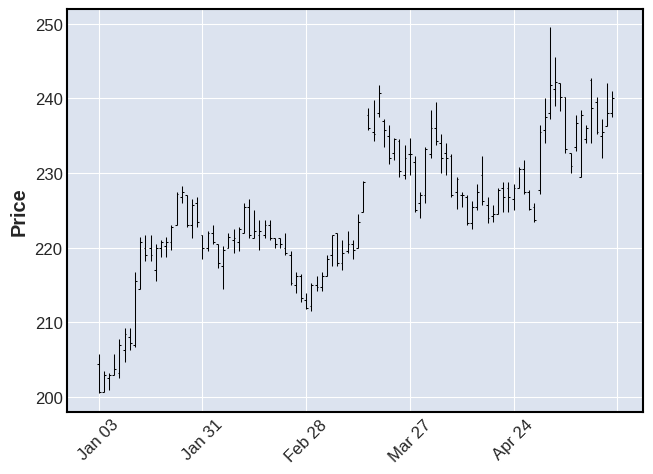

In [7]:
mpf.plot(c.head(100))

In [8]:
drought_df = pd.read_csv("issue282/dm_export_20000101_20201026.csv",
                         parse_dates=['MapDate']).sort_values('MapDate').iloc[:, [0, 3, 4, 5, 6, 7]]
drought_df.columns = ['Date', 'D0', 'D1', 'D2', 'D3', 'D4']
drought_df = drought_df.set_index("Date")

In [9]:
drought_df.head(3)
drought_df.tail(3)
drought_df.shape

,D0,D1,D2,D3,D4
Date,,,,,
2000-01-04,"831,638.78","421,811.26","284,241.19",0.00,0.00
2000-01-11,"1,108,904.57","455,810.49","297,691.59",0.00,0.00
2000-01-18,"1,259,927.80","470,609.34","312,277.94",0.00,0.00


,D0,D1,D2,D3,D4
Date,,,,,
2020-10-06,"642,333.05","464,617.39","394,439.74","417,928.74","62,124.62"
2020-10-13,"625,665.41","514,903.88","392,522.99","444,500.20","62,124.62"
2020-10-20,"650,614.11","535,246.81","339,924.47","463,336.92","84,856.92"


(1086, 5)

In [10]:
drought_df = drought_df.apply(lambda x: x.str.replace(',','')).astype(float, errors='ignore')

In [11]:
drought_df.head(3)
drought_df.tail(3)
drought_df.shape

,D0,D1,D2,D3,D4
Date,,,,,
2000-01-04,831638.78,421811.26,284241.19,0.0,0.0
2000-01-11,1108904.57,455810.49,297691.59,0.0,0.0
2000-01-18,1259927.80,470609.34,312277.94,0.0,0.0


,D0,D1,D2,D3,D4
Date,,,,,
2020-10-06,642333.05,464617.39,394439.74,417928.74,62124.62
2020-10-13,625665.41,514903.88,392522.99,444500.20,62124.62
2020-10-20,650614.11,535246.81,339924.47,463336.92,84856.92


(1086, 5)

In [14]:
drought = pd.DataFrame(index=c.index)
drought = pd.concat([drought, drought_df], 1).fillna(method='ffill')

In [16]:
drought.head(3)
drought.tail(3)
drought.shape
c.head(3)
c.tail(3)
c.shape

,D0,D1,D2,D3,D4
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,831638.78,421811.26,284241.19,0.0,0.0
2000-01-05,831638.78,421811.26,284241.19,0.0,0.0


,D0,D1,D2,D3,D4
Date,,,,,
2020-10-22,650614.11,535246.81,339924.47,463336.92,84856.92
2020-10-23,650614.11,535246.81,339924.47,463336.92,84856.92
2020-10-26,650614.11,535246.81,339924.47,463336.92,84856.92


(5431, 5)

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,204.50,205.75,200.50,200.75,45463
2000-01-04,200.75,203.50,200.75,203.00,35327
2000-01-05,202.50,203.25,201.00,203.00,30219


,Open,High,Low,Close,Volume
Date,,,,,
2020-10-22,413.75,419.00,410.75,416.25,196234
2020-10-23,415.00,420.00,414.00,419.25,168924
2020-10-26,419.25,419.75,417.00,418.00,26751


(5431, 5)

In [21]:
a = drought.sum(1)
b = drought.iloc[1:,:].sum(1)
a.describe()
b.describe()

count    5.431000e+03
mean     1.500877e+06
std      4.100989e+05
min      0.000000e+00
25%      1.208786e+06
50%      1.494506e+06
75%      1.767886e+06
max      2.605727e+06
dtype: float64

count    5.430000e+03
mean     1.501153e+06
std      4.096305e+05
min      3.059210e+05
25%      1.208786e+06
50%      1.494782e+06
75%      1.767886e+06
max      2.605727e+06
dtype: float64

<AxesSubplot:>

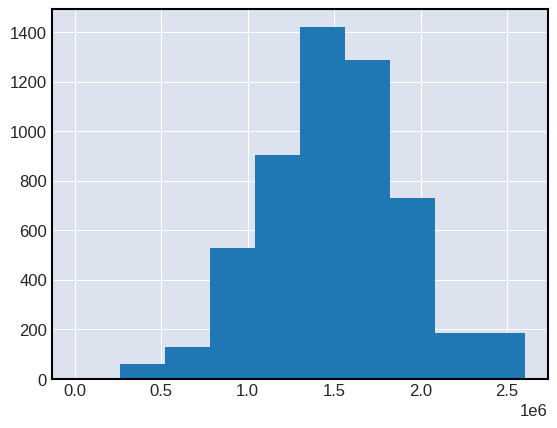

In [25]:
a.hist()

<AxesSubplot:>

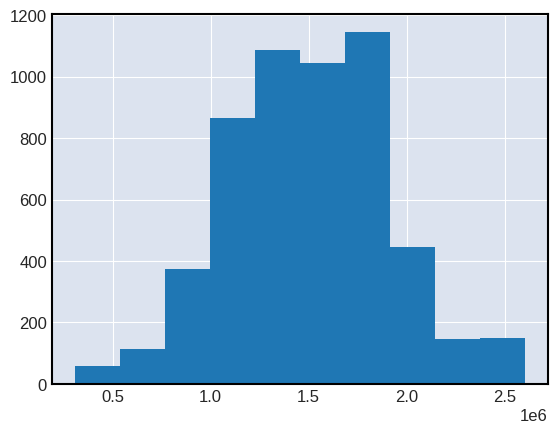

In [26]:
b.hist()

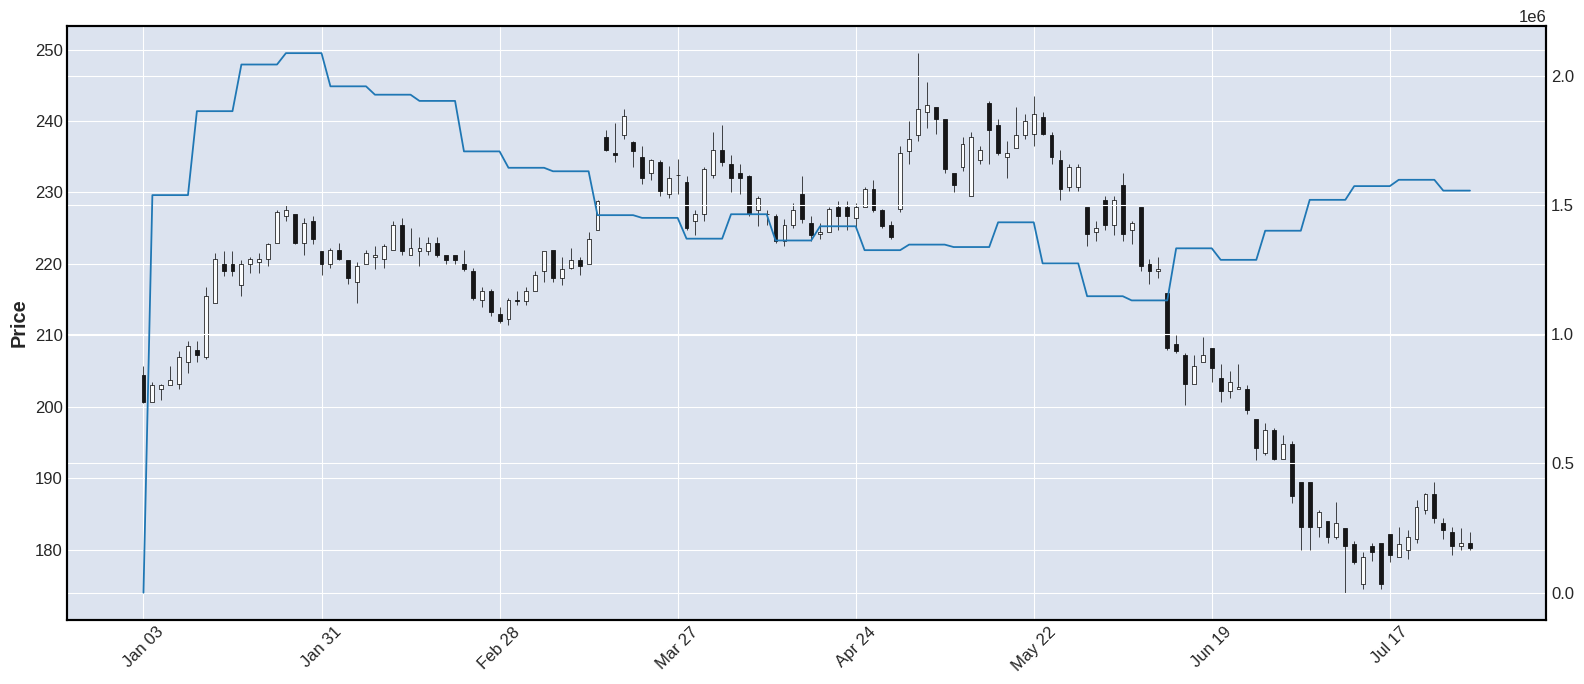

In [40]:
fig = mpf.figure(figsize=(16, 7), tight_layout=True,style='default')
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
apds = [mpf.make_addplot(drought.iloc[0:150,:].sum(1), ax=ax2, secondary_y=True),]
#apds = [mpf.make_addplot(drought.iloc[0:,:].sum(1), ax=ax2, secondary_y=True),]

mpf.plot(c.iloc[0:150,:],addplot=apds, ax=ax1,volume=False,type='candle')
#mpf.plot(c.iloc[0:,:],addplot=apds, ax=ax1,volume=False,type='candle')

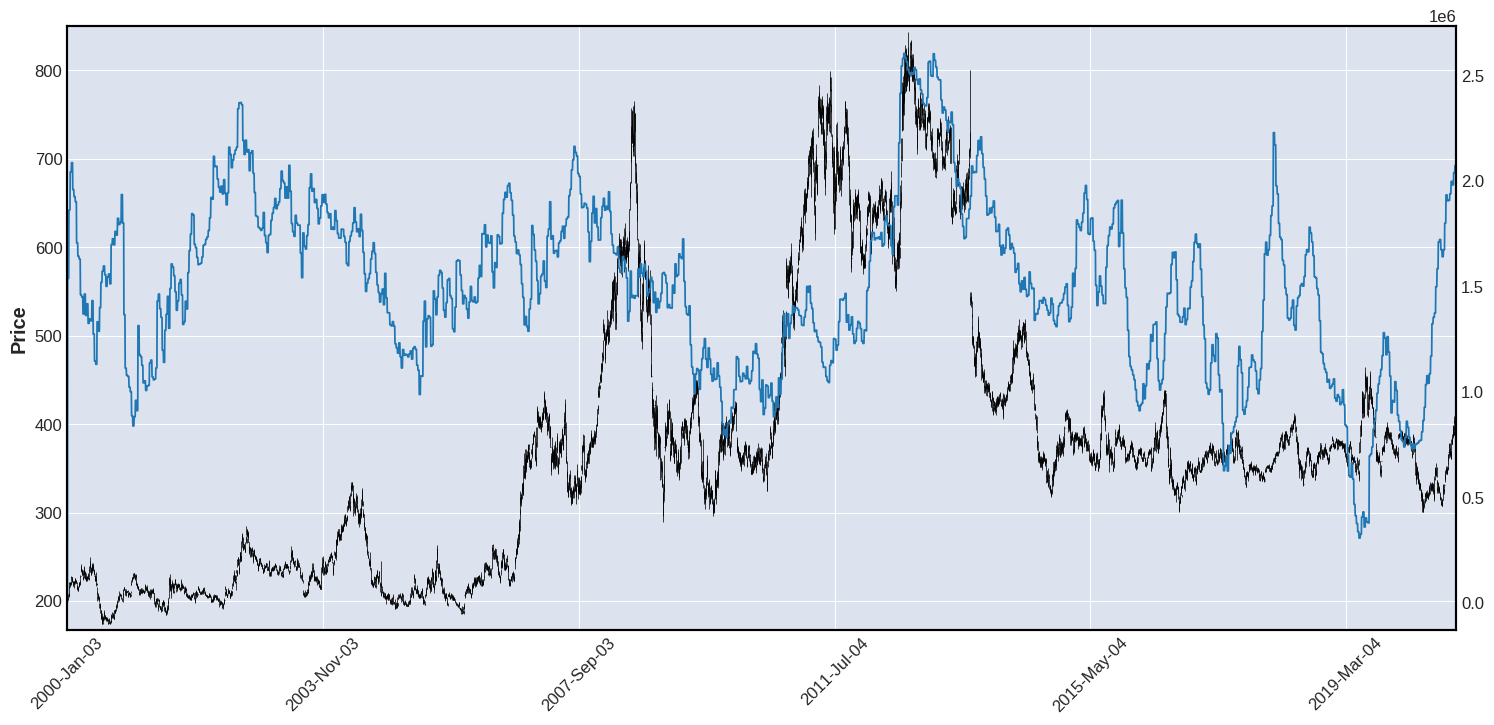

In [34]:
#apds = mpf.make_addplot(b, secondary_y=True)
#mpf.plot(c.iloc[1:,:],addplot=apds,volume=False)

apds = mpf.make_addplot(drought.sum(1),secondary_y=True)
mpf.plot(c,addplot=apds,volume=False,figsize=(16, 7),tight_layout=True)